## ML - EXP - 5

Atharva Prashant Pawar (9427) - [ Batch - D ]

Q1. suppose we are given the following positively labeled dataset

[(3,1), (3,-1),(6,1),(6,-1)]

and given the following negatively labeled dataset

[(1,0),(0,1),(0,-1),(-1,0)]

find the equation of hyperplane for classifying classes.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [ ]:
# Positively labeled
X_pos = np.array([[3, 1], [3, -1], [6, 1], [6, -1]])
y_pos = np.array([1, 1, 1, 1])

# Negatively labeled
X_neg = np.array([[1, 0], [0, 1], [0, -1], [-1, 0]])
y_neg = np.array([-1, -1, -1, -1])

X = np.vstack((X_pos, X_neg))
y = np.concatenate((y_pos, y_neg))

In [ ]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X, y)

# Hyperplane equation coefficients
w1 = svm_classifier.coef_[0][0]
w2 = svm_classifier.coef_[0][1]
b = svm_classifier.intercept_[0]

print(f"Equation of the hyperplane: {w1:.2f} * x + {w2:.2f} * y + {b:.2f} = 0")

Equation of the hyperplane: 1.00 * x + -0.00 * y + -2.00 = 0


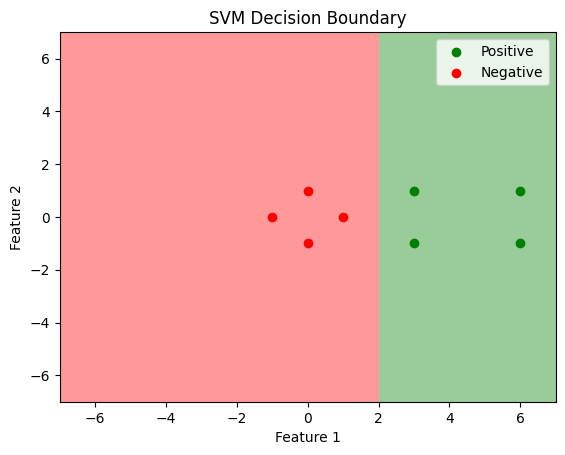

In [ ]:
x_min, x_max = -7, 7
y_min, y_max = -7, 7
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = svm_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

distances = svm_classifier.decision_function(X)

plt.figure()
plt.scatter(X_pos[:, 0], X_pos[:, 1], color='green', label='Positive')
plt.scatter(X_neg[:, 0], X_neg[:, 1], color='red', label='Negative')
plt.contourf(xx, yy, Z, levels=[-100, 0, 100], colors=['red', 'green'], alpha=0.4)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('SVM Decision Boundary')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

Q2. 2. suppose we are given the following positively labeled dataset

[(2,2), (2,-2),(-2,-2),(-2,2)]

and given the following negatively labeled dataset

[(1,1),(1,-1),(-1,-1),(-1,1)]

find the equation of hyperplane for classifying classes.

In [ ]:
# Positively labeled dataset
X_pos = np.array([[2,2], [2,-2], [-2,-2], [-2, 2]])
y_pos = np.array([1, 1, 1, 1])

# Negatively labeled dataset
X_neg = np.array([[1,1], [1,-1], [-1,-1], [-1,1]])
y_neg = np.array([-1, -1, -1, -1])

# Combine the datasets
X = np.vstack((X_pos, X_neg))
y = np.concatenate((y_pos, y_neg))

In [ ]:
# SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X, y)

# Hyperplane equation coefficients
w1 = svm_classifier.coef_[0][0]
w2 = svm_classifier.coef_[0][1]
b = svm_classifier.intercept_[0]

print(f"Equation of the hyperplane: {w1:.2f} * x + {w2:.2f} * y + {b:.2f} = 0")


Equation of the hyperplane: 0.00 * x + 0.00 * y + -0.00 = 0


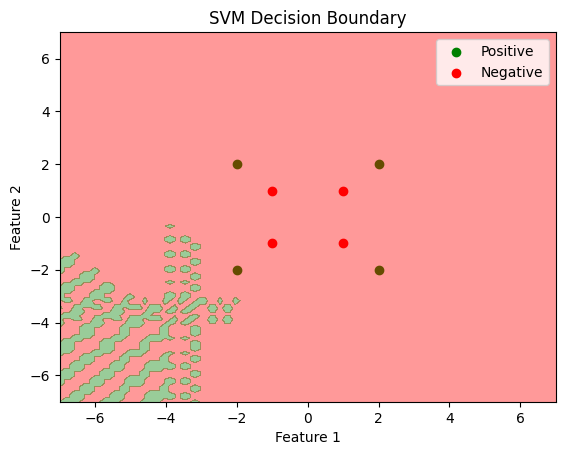

In [ ]:
x_min, x_max = -7, 7
y_min, y_max = -7, 7
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = svm_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

distances = svm_classifier.decision_function(X)

plt.figure()
plt.scatter(X_pos[:, 0], X_pos[:, 1], color='green', label='Positive')
plt.scatter(X_neg[:, 0], X_neg[:, 1], color='red', label='Negative')
plt.contourf(xx, yy, Z, levels=[-100, 0, 100], colors=['red', 'green'], alpha=0.4)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('SVM Decision Boundary')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

Q3. 3. Consider the following training data,

class : +,+,+,-,-,-

X1:	1,2,2,0,1,0

X2:	1,2,0,0,0,1

construct the weight vector of the maximum margin hyperplane

In [ ]:
# Training data
X = np.array([[1, 1], [2, 2], [2, 0], [0, 0], [1, 0], [0, 1]])
y = np.array(['A', 'A', 'A', 'B', 'B', 'B'])

# Map class labels to numerical values (+1 for A, -1 for B)
y_numeric = np.where(y == 'A', 1, -1)

In [ ]:
svm_classifier = SVC(kernel='linear', C=1e6)  # Use a large value for C to enforce hard margin
svm_classifier.fit(X, y_numeric)

SVC(C=1000000.0, kernel='linear')

In [ ]:
# Hyperplane equation coefficients
w1 = svm_classifier.coef_[0][0]
w2 = svm_classifier.coef_[0][1]
b = svm_classifier.intercept_[0]

# Weight vector
weight_vector = svm_classifier.coef_.ravel()
print("Weight Vector:", weight_vector)

Weight Vector: [2. 2.]


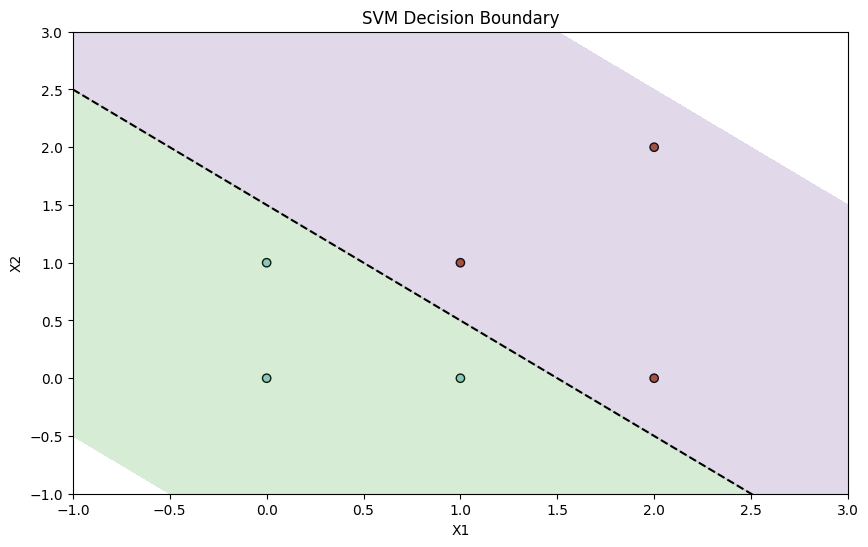

In [ ]:
x_min, x_max = -1, 3
y_min, y_max = -1, 3
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = svm_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the points and the decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_numeric, cmap=plt.cm.Paired, edgecolors='k')
plt.contourf(xx, yy, Z, levels=[-6, 0, 6], alpha=0.2, cmap=plt.cm.Paired)
plt.plot([x_min, x_max], [(-w1*x_min - b) / w2, (-w1*x_max - b) / w2], 'k--')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM Decision Boundary')
plt.show()